## Natural Computing assignment 1: "Evolutionary Computing "

Link to code: https://github.com/PeaceDucko/radboud-msc-ds-natcomp/tree/main/assignment_1

| Exercise | DONE? |
| :------: | :---- |
| 1 | Y |
| 2 | Y |
| 3 | Y |
| 4 | Y |
| 5 | Y |
| 6 | Y |
| 7 | Y |
| 8 | Y |

## 1. (Schemata) \[0.5  point\]
Consider  the  two  schemata A1  =  #0#101###, A2  =##010#111.
Which  of  the  two  schemata  has  the  highest  chance  to  survive  mutation, for a mutation rate $$p_m= 0.01$$?  (Justify your answer).

The probability a schema H survives under mutation: 

$S_m(H) = (1-p_m)^{o(H)}$

$o(H) =$  The order of a schema is the number of its fixed bits, i.e. the number of bits that are not ‘*’ in the schema 

$o(A1) = 4$

$o(A2) = 6$

$S_m(A1) = (1-0.01)^{4} = 0.96059601$

$S_m(A2) = (1-0.01)^{6} = 0.9414801494$

A1 has a higher survival chance as seen in the calculation.

## 2. (Building Block Hypothesis) \[0.5 point\]
Describe a problem where the Building Block Hypothesis does not hold. Explain why.

BBH does not hold for problems where there is no information available which could guide a GA to the global optimum through the composition of partial sub-optimal solution.

An example of this would be the boolean satisfyiability problems, most famously 3-SAT.

3-SAT is the problem of determining the satisfyability of a given a boolean formula that follows the 3-SAT conditions. (conjunctive normal form where each clause is limited to at most three literals)

Since every variable may occur in multiple clauses, it is not possible to solve clauses independently of one another in general. Worst case, all combinations of truth value instantiations need to be checked.



## 3. (Selection  Pressure)  \[1  point\]
Given  the  fitness  function $$f(x)=x^2$$, calculate  the probability  of  selecting  the  individuals $$x=2$$, $$x=3$$, and $$x=4$$, using roulette wheel selection.
Calculate the probability of selecting the same individuals when the fitness function is scaled as follows $$f_1(x) = f(x) + 20$$.
Which fitness function yields a lower selection pressure? 
What can you conclude about the effect of fitness scaling on selection pressure?

Roulette wheel selection probability: 

$$p_s(x)=\frac{f(x)}{\sum_{i=1}^{N} f(x_i)}$$

With $f(x)=x^2, N=3$

So: 

$$p_s(2)=\frac{2^2}{2^2 + 3^2 + 4^2}=\frac{4}{29}=0.13793$$

$$p_s(3)=\frac{3^2}{29}=\frac{9}{29}=0.31034$$

$$p_s(4)=\frac{4^2}{29}=\frac{16}{29}=0.55172$$

And once more with $f_1(x)=f(x)+20$, so:

$$p_s(x)=\frac{f(x)+20}{\sum_{i=1}^{N} f(x_i)+20}$$

$$p_s(2)=\frac{2^2+20}{(2^2+20) + (3^2+20) + (4^2+20)}=\frac{24}{24 + 29 + 36}=\frac{24}{89}=0.26966$$

$$p_s(3)=\frac{3^2+20}{89}=\frac{29}{89}=0.32584$$

$$p_s(4)=\frac{4^2+20}{89}=\frac{36}{89}=0.40449$$

The $$f_1$$ fitness function yields lower selection pressure, in the sense that higher fitness individuals are dampened and low fitness individuals are boosted.
You could consider it a smoothed version of the $$f$$ fitness function.
We conclude that fitness scaling can have a substantial effect on selection pressure, because it can manipulate the effective fitness in pretty much any way we see fit. (pun intended)


## 4. (Role of selection in GA’ s) \[2 points\]
A simple (1 + 1)-GA for binary problems works as follows.
* (a) Randomly generate a bit sequence $$x$$.
* (b) Create a copy of $$x$$ and invert each of its bits with probability $$p$$.
Let $$x_m$$ be the result.
* (c) If $$x_m$$ is closer to the goal sequence than $$x$$ then replace $x$ with $$x_m$$.
* (d) Repeat the process from step (b) with the new $$x$$ until the goal sequence is reached.

The Counting Ones problem amounts to find a bit string whose sum of its entries is maximum.

Implement a simple (1 + 1)-GA for solving the Counting Ones problem.

* (a) Use bit strings of length $$l=100$$ and a mutation rate $$p=1/l$$.
For a run of 1500 iterations, plot the best fitness against the elapsed number of iterations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
l = 100
p = 1/l

ITERS = 1500

fitness = lambda x: x**2
decode = lambda x: int(x,2)
encode = lambda x: "{0:b}".format(x).zfill(l)
mutate = lambda x: x ^ int("".join(["1" if x <= p else "0" for x in np.random.rand(l)]),2)
optimum = decode("1"*l) # In realistic scenarios, this isn't known

Optimum reached in iter 872


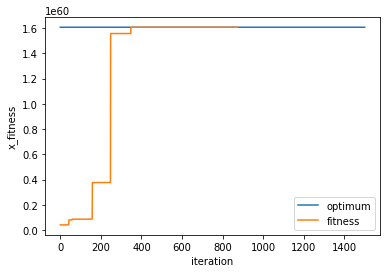

End result was 1267650600228229401496703205375.
Optimum to reach was 1267650600228229401496703205375
Difference was 0


In [ ]:
x = random.getrandbits(l)
history_fit = []
history_fit.append(fitness(x))

for ix in range(ITERS):
    x_m = mutate(x)
    if fitness(x_m) > fitness(x):
        x = x_m
    history_fit.append(fitness(x))
    if fitness(x) == fitness(optimum): # Stopping condition as defined in (d)
        print(f"Optimum reached in iter {ix}")
        break

plt.figure()
plt.plot(list(range(ITERS+1)), [fitness(optimum)]*(ITERS+1), label='optimum')
plt.plot(list(range(len(history_fit))), history_fit, label='fitness')
plt.ylabel("x_fitness")
plt.xlabel("iteration")
plt.legend()
plt.show()

print(f"End result was {x}.\nOptimum to reach was {optimum}\nDifference was {optimum-x}")

* (b) Now do 10 runs.
How many times the algorithm finds the optimum?

Optimum of run 0 reached in iter 1065
Optimum of run 1 reached in iter 1021
Optimum of run 2 reached in iter 971
Optimum of run 4 reached in iter 1145
Optimum of run 5 reached in iter 1104
Optimum of run 6 reached in iter 916
Optimum of run 7 reached in iter 1015
Optimum of run 9 reached in iter 1059
Found the optimum 8 times


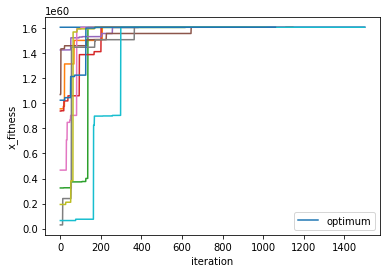

In [ ]:
RUNS = 10
found_best_count = 0
history_fit_runs = []
for run in range(RUNS):
    x = random.getrandbits(l)
    history_fit = []
    history_fit.append(fitness(x))

    for ix in range(ITERS):
        x_m = mutate(x)
        if fitness(x_m) > fitness(x):
            x = x_m
        history_fit.append(fitness(x))
        if fitness(x) == fitness(optimum): # Stopping condition as defined in (d)
            print(f"Optimum of run {run} reached in iter {ix}")
            found_best_count += 1
            break
    history_fit_runs.append(history_fit)
print(f"Found the optimum {found_best_count} times")

plt.figure()
plt.plot(list(range(ITERS+1)), [fitness(optimum)]*(ITERS+1), label='optimum')
for el in history_fit_runs:
    plt.plot(list(range(len(el))), el)
plt.ylabel("x_fitness")
plt.xlabel("iteration")
plt.legend()
plt.show()

* (c) Now replace (c) in the above algorithm with (c’):  replace $$x$$ with $$x_m$$.
Is there a difference in performance when using this modification? Justify your answer.

Found the optimum 0 times


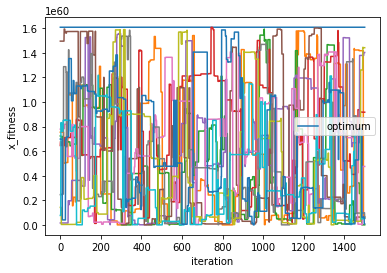

In [ ]:
found_best_count = 0
history_fit_runs = []
for run in range(RUNS):
    x = random.getrandbits(l)
    history_fit = []
    history_fit.append(fitness(x))

    for ix in range(ITERS):
        x_m = mutate(x)
        x = x_m
        history_fit.append(fitness(x))
        if fitness(x) == fitness(optimum): # Stopping condition as defined in (d)
            print(f"Optimum of run {run} reached in iter {ix}")
            found_best_count += 1
            break
    history_fit_runs.append(history_fit)

print(f"Found the optimum {found_best_count} times")

plt.figure()
plt.plot(list(range(ITERS+1)), [fitness(optimum)]*(ITERS+1), label='optimum')
for el in history_fit_runs:
    plt.plot(list(range(len(el))), el)
plt.ylabel("x_fitness")
plt.xlabel("iteration")
plt.legend()
plt.show()

There is a noticeable difference in performance: (c') doesn't end up finding the optimum ever, in practice, and (c) does so pretty often.
This happens because the (c') strategy does not hold on to the best solution found so far.
In a way, you could see the (c) strategy as a random walk over bit string space that only performs the step if it is an improvement of the fitness function, whereas (c') is just a random walk.


In the case where the mutation chance would be 0.5, both (c) and (c') would find the optimum with an equal chance, because mutation would then be equivalent to picking a random bit sequence, instead of a "local step".
Then the chance of obtaining the optimum would be equal to the chance of getting there in a single step.

## 5. (Evolutionary strategies vs local search) \[1 point\]
Consider a (1+5) ES. How does this differ from the (1+1) ES in how the search space is explored when optimizing a  function?   How  does  the  (1+$\lambda$)  ES  strategy  behave  with  respect  to  the  value  of $\lambda$ when compared to greedy algorithms?
(Recall that greedy algorithms perform a sequence of locally optimal steps in order to search for an optimal solution.)

$\mu$ = parent population size.

In the($\mu / \rho + \lambda$) ES strategy, the $\mu$ best of $\mu + \lambda$ are chosen for the next generation.

The (1+1) ES operates on a population of size two: the current point (parent) and the result of its mutation. 
Only if the offsprings fitness is at least as good as the parent one, it becomes the parent of the next generation.

In (1 + $\lambda$) ES, $\lambda$ descendants are generated and compete with the parent. This means that, when we have (1+5)ES, 4 more offsprings will compete with the parent than in the (1+1) version.

This has the effect that the search space will increase and with this the training time.

Generally, greedy algorithms will make a locally optimal choice, informed by a heuristic, to perform a single step. This may involve not evaluating all "descendants", but can also be seen as evaluating all "descendants" according to the specific greedy choice heuristic chosen.
ES really is more of a search-based algorithm, in the sense that it explores a set amount of search space and keeps track of multiple possible solutions on the way.
For the case where the parent population is equal to 1, the two algorithms become slightly more similar.
However, ES isn't guaranteed to take a locally optimal step.
When $\lambda$ approaches $\infty$ (depending on the offspring generation mechanism) it would start to function a lot like the greedy approach, if it's fitness function behaved similar to the greedy choice heuristic used.


## 6. (Memetic  algorithms  vs  simple  EAs)  \[2.5  point\]
Implement  the  simple  EA  for the TSP described in our first lecture (see slides).

* (a) Implement a variant of this algorithm based on memetic algorithms.
Compare the performance of the two algorithms in a fair way on the TSP problem in-stance given in the file ‘file-tsp’ and on one small instance at your choice from the ‘Symmetric Traveling Salesman Problem’ benchmark instances available at http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsplib.html.
The  file ‘file-tsp’  contains  a  50×2  matrix  with  the  coordinates  $$(xi,yi)$$  for  city $$i=1,...,50$$.
Please provide URL link to your source code and results containing clear instructions on how to reproduce your results.

In [ ]:
from scipy.spatial import distance
import random
import numpy as np

def splitfile(filename):
    with open(filename) as infile: # Use infile to refer to the file object
        return(infile.read().splitlines())

def random_pop(xy):
    # We create a random population of 50 
    random_population = (list(range(0, len(xy))))
    random.shuffle(random_population)
    return random_population

def fitness(x, xy):
    total = 0 
    #calculate fitness by calculating euclidean distance for (i - (i+1))
    for i in range(len(x)-1):
        var = np.split(np.array(xy), len(x))
        strvar1 = var[x[i]][0]
        fvar1 = strvar1.split()
        strvar2 = var[x[i+1]][0]
        fvar2 = strvar2.split()
        var1 = np.array([float(fvar1[0]), float(fvar1[1])])
        var2 = np.array([float(fvar2[0]),float(fvar2[1])])
        total +=  distance.euclidean(var1, var2)
    return total

def single_point_crossover(parent1, parent2, X):
    child1 = np.append(parent1[:X],parent2[X:]) 
    child2 = np.append(parent1[:X],parent2[X:])
    return child1, child2

def multi_point_crossover(parent1, parent2, X):
    for i in X:
        child1, child2 = single_point_crossover(parent1,parent2,i)
    return child1, child2

def mutation(x):
    #mutate by swapping random values
    length = range(len(x))
    i1, i2 = random.sample(length, 2)
    x[i1], x[i2] = x[i2], x[i1]
    return x

def run(parent1,parent2,xy, fails=0, iters=0):
    X = np.random.randint(len(parent1), size=2)
    child1, child2 = multi_point_crossover(parent1,parent2, X)
    child1 = mutation(child1)
    child2 = mutation(child2)

    new_parents = dict()

    new_parents[0] = parent1
    new_parents[1] = parent2

    #need for iterative
    for i, child in enumerate([child1, child2]):
        for parent in [parent1, parent2]:
            if fitness(child, xy) < fitness(parent, xy):
                new_parents[i] = child
                #if run finds better child than parent reset the fails
                fails=0
    
    #when failing 50 times in a row to find better child, stop trying.
    iters = iters + 1
    if fails >= 50:
        return print("Best fitness after {} iterations: {}".format(iters, str(min(fitness(new_parents[0], xy),fitness(new_parents[1], xy)))))
    fails = fails + 1
    run(new_parents[0], new_parents[1], xy, fails, iters)

def main(filename):
    xy = splitfile(filename)
    var1 = random_pop(xy)
    var2 = random_pop(xy)
    run(var1, var2, xy)

main("file-tsp.txt")
main("berlin52-tsp.txt")

Best fitness after 453 iterations: 202.473206507589
Best fitness after 1147 iterations: 8426.356393082513


* (b) On  the  TSP  problem  are  memetic  algorithms  more  effective  than  the  simpleEA’ s?
(To answer this question, use the results of your investigation as well as recent results from the literature).

On the literature page the best result for the berlin52 file was 7542.
On our best try we got 7288.064894118817 for this file. 
So this memetic algorithm can yield better results than the simpleEA from the literature. 
With this we can conclude that for atleast this kind of problem a memetic algorithm can have the advantage, because
it is noteworthy that not all atempts were this close. Some attemps got a best fitness of around 13000. So local optimization is not the most stable, but can produce better results than a simpleEA. 

## 7. (Genetic Programming representation) \[0.5 point\]
Give a suitable function, terminal set and s-expression for the following logical and mathematical formulas:

* (a) $$(y∧true)→((x∨y)∨(z↔(x∧y)))$$,

* (b) $$0.234*z+x-0.789$$.

(a): For the terminal set, we choose the booleans $$true$$ and $$false$$ and variable identifiers.

For the function set, we choose the logical connectives. (e.g. $$\land$$, $$\lor$$, $$\implies$$, $$\lnot$$, etc).

A corresponding s-expression of the given formula would then be:

$$(\implies (\land \; y \; true) \; (\lor \; (\lor \; x \; y) \; (\iff \; z \; (\land \; x \; y))))$$

(b): For the terminal set, we pick decimal number representations and variable identifiers.

For the function set, we choose arithmetic operators (from this given formula we know that we at least have $$+$$,$$-$$,$$*$$, but it wouldn't be unjustifiable to include more, such as $$/$$).

A corresponding s-expression of the given formula would be:

$$(- \; (+ \; (* \; 0.234 \; z) \; x) \; 0.789)$$

## 8. (Genetic Programming behaviour)  \[2  points\] 
Implement a GP program for finding a symbolic expression that fits the following data:

| (Input) Dependent Variable) | Y(Output) |
| --- | --- |
| -1.0 | 0.0000 |
|—1.0| 0.0000
|—0.9 |—0.1629
|—0.8 |—0.2624
|—0.7 |—0.3129
|—0.6 |—0.3264
|—0.5 |—0.3125
|—0.4 |—0.2784
|—0.3| —0.2289
|—0.2 |—0.1664
|—0.1 |—0.0909
|0 |0.0
|0.1| 0.1111
|0.2 |0.2496
|0.3| 0.4251
|0.4| 0.6496
|0.5 |0.9375
|0.6 |1.3056
|0.7 |1.7731
|0.8 |2.3616
|0.9| 3.0951
|1.0 |4.0000

with the following parameter setting: 
- population size: 1000,
- function set: $$\{+, -, *, log, exp, sin, cos, div\}$$,
- terminal set: $$x$$,
- number of generations 50,
- crossover probability 0.7,
- mutation probability: 0,
- fitness: - sum of absolute errors.

You can use an existing GP framework: see for instance list of implementation frameworks mentioned in the syllabus.

Plot the following:

- (a) best of generation fitness (y-axis) versus generation (x-axis).
- (b) best of generation size (y-axis) versus generation (x-axis).

Can you observe any undesirable phenomenon from these plots? In case of positive answer, how would you try to overcome the related problem (you can refer to the
literature).

Please provide URL link to your source code and results containing clear instructions on how to reproduce your results.

In [ ]:
!sudo add-apt-repository universe
!sudo apt update
!sudo apt -y install graphviz-dev
!pip install pygraphviz
!pip install pydotplus
# DO NOT MOVE TO REQUIREMENTS.TXT
# THE PIP INSTALL ONLY WORKS AFTER THE APT INSTALL

sudo: add-apt-repository: command not found
Get:1 http://security.debian.org/debian-security buster/updates InRelease [65.4 kB]
Get:2 http://deb.debian.org/debian buster InRelease [122 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [51.9 kB]
Get:4 http://security.debian.org/debian-security buster/updates/main amd64 Packages [267 kB]
Get:5 http://deb.debian.org/debian buster/main amd64 Packages [7,907 kB]
Get:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [9,504 B]
Fetched 8,422 kB in 2s (4,771 kB/s)



18 packages can be upgraded. Run 'apt list --upgradable' to see them.



Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
The following additional packages will be installed:
  libgvc6-plugins-gtk
The following NEW packages will be installed:
  libgraphviz-dev libgvc6-plugins-gtk
0 upgraded, 2 newly installed, 0 to remove and 18 not upgraded.
Need to get 163 kB of archives.
After this operation, 411 kB of additional disk space will be used.


In [ ]:
from deap import base, creator, gp, tools, algorithms
import operator
import math
import sys

GP_DATA = [
    [-1.0,  0.0000],
    [-1.0, 0.0000],
    [-0.9, -0.1629],
    [-0.8, -0.2624],
    [-0.7, -0.3129],
    [-0.6, -0.3264],
    [-0.5, -0.3125],
    [-0.4, -0.2784],
    [-0.3, -0.2289],
    [-0.2, -0.1664],
    [-0.1, -0.0909],
    [0, 0.0],
    [0.1, 0.1111],
    [0.2, 0.2496],
    [0.3, 0.4251],
    [0.4, 0.6496],
    [0.5, 0.9375],
    [0.6, 1.3056],
    [0.7, 1.7731],
    [0.8, 2.3616],
    [0.9, 3.0951],
    [1.0, 4.0000]
]

GP_POPSIZE = 1000
GP_GENCOUNT = 50
GP_CROSS_PROB = 0.7
GP_MUT_PROB = 0

# Create function set and terminal set
def pDiv(left, right):
    try:
        return left // right
    except ZeroDivisionError:
        return 1

def pLog(x):
    if x <= 0:
        return math.log(sys.float_info.epsilon)
    else:
        return math.log(x)

def pExp(x):
    try:
        return math.exp(x)
    except OverflowError:
        return float('inf')

def pMul(x,y):
    try:
        return x * y
    except OverflowError:
        return float('inf')

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(pLog, 1) # Natural log assumed
pset.addPrimitive(math.exp, 1)
pset.addPrimitive(math.sin, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(pDiv, 2)
pset.renameArguments(ARG0='x')

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

In [ ]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

# Define the fitness function
def evalSymbReg(individual):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    # Evaluate the sum of absolute errors between the expression and the given dataset
    aerrors = (abs(func(x) - y) for x, y in GP_DATA)
    return (math.fsum(aerrors),)

toolbox.register("evaluate", evalSymbReg)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)


In [ ]:
# Track the best (lowest in this case) fitness and size for each generation
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("min", np.min)
mstats.register("max", np.min)
mstats.register("avg", np.mean)

When running this following code, numerical domain issues might happen.
We've mitigated it as much as possible with the pDiv, pMul, pExp, pLog functions, but we cannot guarantee that we got all edge cases.
It shouldn't happen, but if it does, simply run the cell again.

In [ ]:
# Perform the evolution
pop = toolbox.population(n=GP_POPSIZE)
hof = tools.HallOfFame(1)
pop, log = algorithms.eaSimple(pop, toolbox, GP_CROSS_PROB, GP_MUT_PROB, GP_GENCOUNT, stats=mstats,
                                halloffame=hof, verbose=True)

   	      	               fitness                	                 size                 
   	      	--------------------------------------	--------------------------------------
gen	nevals	avg    	gen	max    	min    	nevals	avg 	gen	max	min	nevals
0  	1000  	128.145	0  	4.61486	4.61486	1000  	3.53	0  	2  	2  	1000  
1  	726   	27.2439	1  	4.61486	4.61486	726   	3.326	1  	2  	2  	726   
2  	688   	19.8532	2  	4.61486	4.61486	688   	3.058	2  	2  	2  	688   
3  	742   	18.2723	3  	4.61486	4.61486	742   	3.077	3  	2  	2  	742   
4  	706   	19.0286	4  	4.61486	4.61486	706   	3.542	4  	2  	2  	706   
5  	742   	21.0757	5  	4.61486	4.61486	742   	4.055	5  	2  	2  	742   
6  	662   	3.35963e+12	6  	2.99582	2.99582	662   	4.319	6  	2  	2  	662   
7  	706   	13.3325    	7  	2.99582	2.99582	706   	4.311	7  	2  	2  	706   
8  	700   	12.5042    	8  	2.99582	2.99582	700   	4.151	8  	2  	2  	700   
9  	696   	13.2095    	9  	2.99582	2.99582	696   	4.06 	9  	2  	2  	696   
10 	706   	11.655     	10 	

We want to inspect the highest fitness individual:

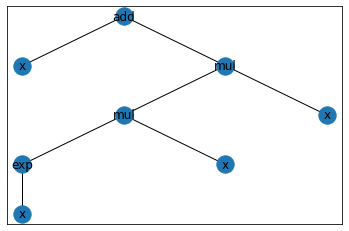

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

nodes, edges, labels = gp.graph(hof[0])
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = graphviz_layout(g, prog="dot")

nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.show()

Now to actually fulfill the requirements of the exercise, we plot the best of generation fitness (y-axis) versus generation (x-axis):

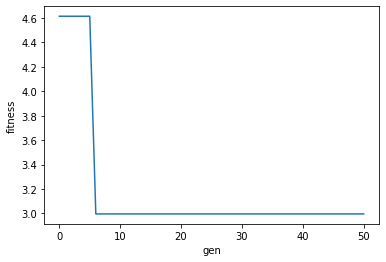

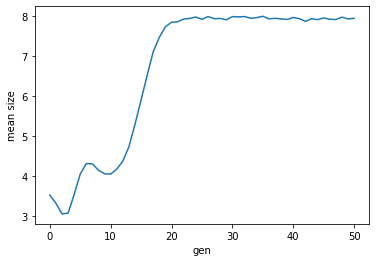

In [ ]:
gens, min_fits = log.chapters['fitness'].select('gen','min')

plt.figure()
plt.plot(gens, min_fits)
plt.ylabel("fitness")
plt.xlabel("gen")
plt.show()

gens, sizes = log.chapters['size'].select('gen','avg')

plt.figure()
plt.plot(gens, sizes)
plt.ylabel("mean size")
plt.xlabel("gen")
plt.show()

These plots are the best and worst fitness per generation, and the mean size per generation. (Do note that the max or min size is not equivalent to the size of the highest-fitness individual of a generation)

We notice that while the fitness does seem to converge to a pretty good result, the formula size increases about linearly in size based on training time.
Inspecting the graphs of high fitness individuals, we can also see some questionable nodes, such as stacks of $$sin$$ applications.

One way to try to avoid the problem of size inflation would be to trim trees over a certain size.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=89440646-9834-412c-9b8b-9adf276da239' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>